![picture](https://www.ifsc.edu.br/documents/1035121/12422695/snct22.png/98414174-41b4-41f1-a8c9-3c70cac512ea?t=1661898737261)

#Fazendo o download do dataset com os sinais de EMG
O dataset original encontra-se em https://archive.ics.uci.edu/ml/datasets/EMG+data+for+gestures.  
**Informação**   
Cada arquivo txt contém 10 colunas:  
[1] Time - tempo iem ms;  
[2-9] Channel - oito canais do bracelete MYO;  
[10] Class  -Classe correpondente aos gestos:  
0 - dado não marcado,  
1 - mão em estado de repouso,  
2 - mão fechada em formato de punho,  
3 - flexão do punho,  
4 - extensão do punho,  
5 - desvio radial,  
6 - desvio ulnar,  
7 - palma estendida (este gesto não foi executado por alguns sujeitos).  

![picture](http://tocupacional.files.wordpress.com/2008/08/clip-image010.jpg)

In [ ]:
!wget https://github.com/samirbonho/IFSC/raw/master/EMG_data_for_gestures_master.zip -O emg.zip
!unzip "/content/emg.zip" 
!rm  "/content/emg.zip" 

#!unzip /content/drive/MyDrive/IFSC/SNCT/EMG/EMG_data_for_gestures-master.zip 

#Verificando se os registros contém os dados dos eletrodos.
No exemplo abaixo é feito um gráfico com os dados coletados do canal 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

  
# read text file into pandas DataFrame
df = pd.read_csv("/content/EMG_data_for_gestures_master/01/1_raw_data_13-12_22.03.16.txt", sep="\t")
df.head(3)

canal1=df[["time","channel1","class"]]
time = canal1.iloc[:,[0]].values
emgCH1 = canal1.iloc[:,[1]].values
classes= canal1.iloc[:,-1].values

plt.plot(time/1000,emgCH1)
plt.grid


,time,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
0,1,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
1,5,0.00001,-0.00002,-0.00001,-0.00003,0.00000,-0.00001,0.00000,-0.00001,0
2,6,-0.00001,0.00001,0.00002,0.00000,0.00001,-0.00002,-0.00001,0.00001,0


#Criando um dataframe a partir de todos os arquivos de registro dos 36 sujeitos, cada qual com informações dos 8 pares de eletrodos (8 canais)

In [ ]:
import os,glob
import pandas as pd
import numpy as np

counter=0
folder = "/content/EMG_data_for_gestures_master/"
resultados = []

#pd.concat([s1, s2], ignore_index=True)
dataset = pd.DataFrame()
subject_rows=[]
aux=0

for root, dirs, files in os.walk(folder, topdown=False):
  subject_n=root.rsplit('master/', 1)[1]
  for name in files:
    df = pd.read_csv(os.path.join(root, name), sep="\t")

    for i in range(1,7):    
      # df[df['class']==i].iloc[:,1:9] = (df[df['class']==i].iloc[:,1:9] - (df[df['class']==i].iloc[:,1:9].min())) / ((df[df['class']==i].iloc[:,1:9].max()) - (df[df['class']==i].iloc[:,1:9].min()))
      df[df['class']==i].iloc[:,1:9] = ( df[df['class']==i].iloc[:,1:9] - ( df[df['class']==i].iloc[:,1:9].min()).min()) / (( df[df['class']==i].iloc[:,1:9].max()).max() - ( df[df['class']==i].iloc[:,1:9].min()).min())

    frames = [dataset,df]
    dataset=pd.concat(frames, ignore_index=True)
    dataset.loc[aux:(aux+df.shape[0]),'subject'] = subject_n
    aux=aux+df.shape[0]

dataset['subject'].astype(str).astype(int)  #converting Object to int
dataset.drop('time',inplace=True,axis=1) #eliminando a coluna de tempo

dataset['subject'].value_counts()
len(dataset['subject'].value_counts())

## eliminando os registros com a classe 7 (palma estendida) e classe 0
dataset=dataset[dataset['class']!=7.0] 
dataset=dataset[dataset['class']!=0.0] 

dataset['class'].value_counts()

dataset.describe()



,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,class
count,1.499055e+06,1.499055e+06,1.499055e+06,1.499055e+06,1.499055e+06,1.499055e+06,1.499055e+06,1.499055e+06,1.499054e+06
mean,-8.073273e-06,-9.673501e-06,-9.623449e-06,-9.399869e-06,-1.904691e-05,-1.172092e-05,-9.902799e-06,-1.043682e-05,3.514164e+00
std,1.895365e-04,1.369999e-04,1.379737e-04,2.644813e-04,3.159820e-04,2.491410e-04,1.767302e-04,2.001987e-04,1.709867e+00
min,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,-1.280000e-03,1.000000e+00
25%,-5.000000e-05,-5.000000e-05,-5.000000e-05,-8.000000e-05,-1.300000e-04,-9.000000e-05,-6.000000e-05,-6.000000e-05,2.000000e+00
50%,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,-1.000000e-05,4.000000e+00
75%,4.000000e-05,3.000000e-05,4.000000e-05,6.000000e-05,9.000000e-05,7.000000e-05,4.000000e-05,4.000000e-05,5.000000e+00
max,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,1.270000e-03,6.000000e+00


#Métodos para extrair características dos sinais elétricos
Estas caracterísicas serão utilizadas pelos classificadores para identificação do gesto.

In [ ]:
import numpy as np

def rms(data): #root mean square
      return  np.sqrt(np.mean(data**2,axis=0))  

def abs_diffs_signal(data):
    return np.sum(np.abs(np.diff(data,axis=0)),axis=0)

def zero_crossing(data):
    return np.count_nonzero(np.diff(np.sign(data),axis=0))


#Extração de features
Dependendo das features calculadas/extraidas a performance do classificador pode melhorar ou não!

In [ ]:
sujeitos_dados=dataset.groupby(['subject','class'])
sujeitos_dados.head()

#features=sujeitos_dados.agg(['mean','std','var','min','max',rms,zero_crossing,abs_diffs_signal])
features=sujeitos_dados.agg([ 'min','max',rms,zero_crossing,abs_diffs_signal])
features=features.reset_index()
features['subject']=features['subject'].astype(str).astype(int)  #converting Object to int

features.head(9) 

subject       class    channel1                          \
                                      min         max         rms   
count  216.000000  216.000000  216.000000  216.000000  216.000000   
mean    18.500000    3.500000   -0.000571    0.000555    0.000143   
std     10.412425    1.711792    0.000404    0.000411    0.000129   
min      1.000000    1.000000   -0.001280    0.000020    0.000013   
25%      9.750000    2.000000   -0.000892    0.000200    0.000050   
50%     18.500000    3.500000   -0.000520    0.000510    0.000102   
75%     27.250000    5.000000   -0.000210    0.000873    0.000196   
max     36.000000    6.000000   -0.000040    0.001270    0.000737   

                                        channel2                          ...  \
      zero_crossing abs_diffs_signal         min         max         rms  ...   
count    216.000000       216.000000  216.000000  216.000000  216.000000  ...   
mean     424.990741         0.117284   -0.000429    0.000380    0.000101  ...   
std       66.683772         0.110100    0.000330    0.000332    0.000095  ...   
min      312.000000         0.007820   -0.001280    0.000030    0.000015  ...   
25%      379.000000         0.041415   -0.000598    0.000137    0.000040  ...   
50%      415.000000         0.077000   -0.000320    0.000280    0.000074  ...   
75%      457.000000         0.168882   -0.000170    0.000490    0.000117  ...   
max      719.000000         0.610890   -0.000050    0.001270    0.000589  ...   

         channel7                                                         \
              min         max         rms zero_crossing abs_diffs_signal   
count  216.000000  216.000000  216.000000    216.000000       216.000000   
mean    -0.000484    0.000500    0.000134    419.310185         0.111407   
std      0.000357    0.000367    0.000119     64.973276         0.101449   
min     -0.001280    0.000020    0.000013    308.000000         0.007330   
25%     -0.000710    0.000200    0.000050    376.500000         0.040530   
50%     -0.000410    0.000450    0.000104    409.000000         0.085320   
75%     -0.000190    0.000750    0.000188    447.500000         0.152622   
max     -0.000040    0.001270    0.000609    676.000000         0.511380   

         channel8                                                         
              min         max         rms zero_crossing abs_diffs_signal  
count  216.000000  216.000000  216.000000    216.000000       216.000000  
mean    -0.000562    0.000548    0.000149    417.763889         0.123856  
std      0.000417    0.000411    0.000135     65.869814         0.121489  
min     -0.001280    0.000020    0.000013    292.000000         0.007590  
25%     -0.000933    0.000218    0.000045    374.750000         0.036390  
50%     -0.000465    0.000475    0.000101    406.000000         0.082810  
75%     -0.000180    0.000902    0.000222    453.250000         0.179895  
max     -0.000040    0.001270    0.000675    695.000000         0.698170  

[8 rows x 42 columns]

#Separando as features em arrays para visualização




In [ ]:
features_dict =	{
  "min": 2,
  "max": 3,
  "rms": 4,
  "zero_crossing": 5,
  "abs_diffs_signal": 6,
  "hop":5
}

rms_data = np.zeros((6,len(features['subject'].value_counts())*8))  # x 8 canais
zcross_data = np.zeros((6,len(features['subject'].value_counts())*8))
diff_abs = np.zeros((6,len(features['subject'].value_counts())*8))


##obtendo arrays para RMS e Zero_crossing de todo dataset
for i in range(1,len(features['subject'].value_counts())): # de 1 até o número total de sujeitos no dataset (36) 
   subject_selected=features[features['subject']==i]
   idx=0
   while idx < len(features['subject'].value_counts()):  #pegar os 8 canais   
     aux_data = subject_selected.iloc[:,[features_dict["rms"]+idx]].values
     rms_data = np.append(rms_data,aux_data, axis=1)
     aux_data = subject_selected.iloc[:,[features_dict["zero_crossing"]+idx]].values     
     zcross_data = np.append(zcross_data,aux_data, axis=1)
     aux_data = subject_selected.iloc[:,[features_dict["abs_diffs_signal"]+idx]].values     
     diff_abs = np.append(diff_abs,aux_data, axis=1)
     idx+=features_dict["hop"]

rms_data = rms_data[:,288:]  #36 sujeitos  * 8 canais  zeros numpy
zcross_data = zcross_data[:,288:] 
diff_abs = diff_abs[:,288:] 

#rms_data e as outras features estão organizadas em 6 linhas (uma para cada classe) 
# em cada 8 colunas estão a feature de cada canal para x sujeitos - XX selecionados
idx=0
rms_channel1 =[]
zcross_channel1 =[]
abs_channel1 =[]
rms_channel2 =[]
zcross_channel2 =[]
abs_channel2 =[]
rms_channel3 =[]
zcross_channel3 =[]
abs_channel3 =[]
rms_channel4 =[]
zcross_channel4 =[]
abs_channel4 =[]
rms_channel5 =[]
zcross_channel5 =[]
abs_channel5 =[]
rms_channel6 =[]
zcross_channel6 =[]
abs_channel6 =[]
rms_channel7 =[]
zcross_channel7 =[]
abs_channel7 =[]
rms_channel8 =[]
zcross_channel8 =[]
abs_channel8 =[]

while idx < rms_data.shape[1]:
  rms_channel1.append(rms_data[:,idx])
  zcross_channel1.append(zcross_data[:,idx])
  abs_channel1.append(diff_abs[:,idx])  
  rms_channel2.append(rms_data[:,idx+1])
  zcross_channel2.append(zcross_data[:,idx+1])
  abs_channel2.append(diff_abs[:,idx+1])
  rms_channel3.append(rms_data[:,idx+2])
  zcross_channel3.append(zcross_data[:,idx+2])
  abs_channel3.append(diff_abs[:,idx+2])
  rms_channel4.append(rms_data[:,idx+3])
  zcross_channel4.append(zcross_data[:,idx+3])
  abs_channel4.append(diff_abs[:,idx+3])
  rms_channel5.append(rms_data[:,idx+4])
  zcross_channel5.append(zcross_data[:,idx+4])
  abs_channel5.append(diff_abs[:,idx+4])
  rms_channel6.append(rms_data[:,idx+5])
  zcross_channel6.append(zcross_data[:,idx+5])
  abs_channel6.append(diff_abs[:,idx+5])
  rms_channel7.append(rms_data[:,idx+6])
  zcross_channel7.append(zcross_data[:,idx+6])
  abs_channel7.append(diff_abs[:,idx+6])
  rms_channel8.append(rms_data[:,idx+7])
  zcross_channel8.append(zcross_data[:,idx+7])
  abs_channel8.append(diff_abs[:,idx+7])
  idx+=8 


rms_ch1= np.asarray(rms_channel1).T
zc_ch1= np.asarray(zcross_channel1).T
abs_ch1= np.asarray(abs_channel1).T
rms_ch2= np.asarray(rms_channel2).T
zc_ch2= np.asarray(zcross_channel2).T
abs_ch2= np.asarray(abs_channel2).T
rms_ch3= np.asarray(rms_channel3).T
zc_ch3= np.asarray(zcross_channel3).T
abs_ch3= np.asarray(abs_channel3).T
rms_ch4= np.asarray(rms_channel4).T
zc_ch4= np.asarray(zcross_channel4).T
abs_ch4= np.asarray(abs_channel4).T
rms_ch5= np.asarray(rms_channel5).T
zc_ch5= np.asarray(zcross_channel5).T
abs_ch5= np.asarray(abs_channel5).T
rms_ch6= np.asarray(rms_channel6).T
zc_ch6= np.asarray(zcross_channel6).T
abs_ch6= np.asarray(abs_channel6).T
rms_ch7= np.asarray(rms_channel7).T
zc_ch7= np.asarray(zcross_channel7).T
abs_ch7= np.asarray(abs_channel7).T
rms_ch8= np.asarray(rms_channel8).T
zc_ch8= np.asarray(zcross_channel8).T
abs_ch8= np.asarray(abs_channel8).T


#Análise gráfica das features do sinal

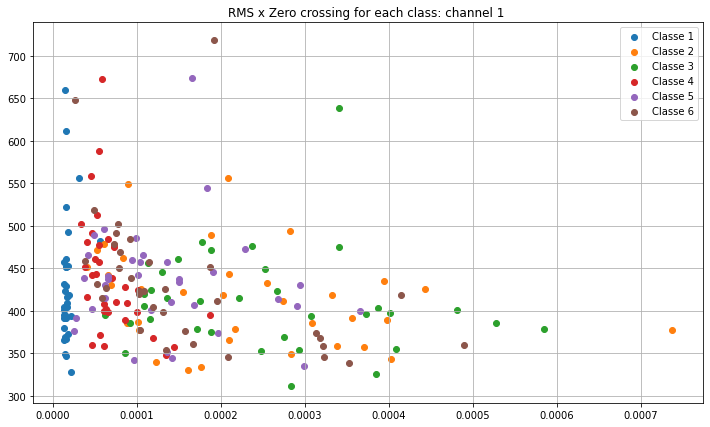

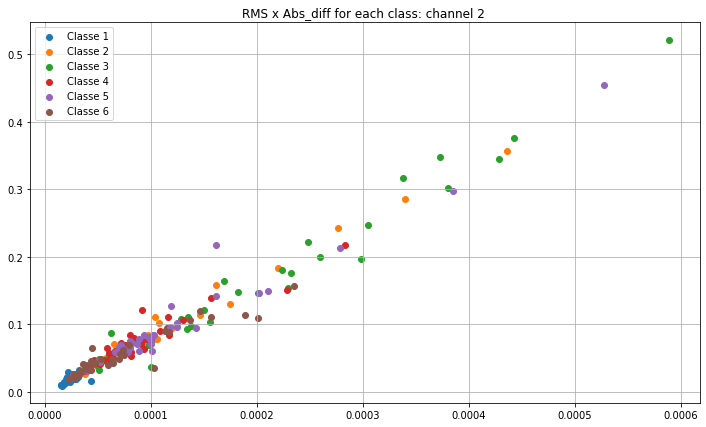

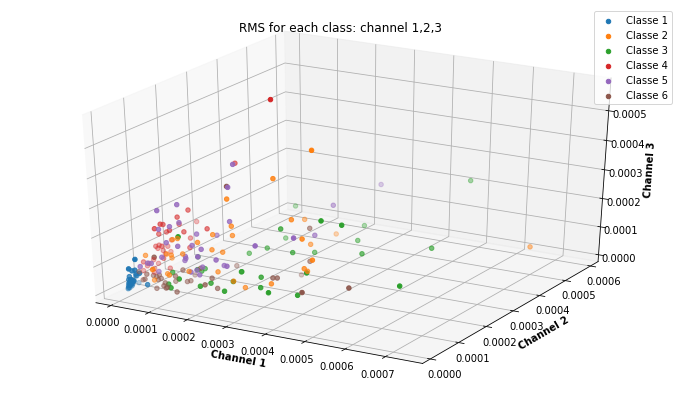

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 7))

for u in range(0,6):
  plt.scatter(rms_ch1[u,:],zc_ch1[u,:],label="Classe " + str(u+1))

plt.title("RMS x Zero crossing for each class: channel 1 ")
plt.legend()
plt.grid() 
plt.show()

####
plt.figure(figsize=(12, 7))
for u in range(0,6):
  plt.scatter(rms_ch2[u,:],abs_ch2[u,:],label="Classe " + str(u+1))

plt.title("RMS x Abs_diff for each class: channel 2 ")
plt.legend()
plt.grid() 
plt.show()



#####
plt.figure(figsize=(12, 7))
ax = plt.axes(projection ="3d")
for u in range(0,6):
  ax.scatter3D(rms_ch1[u,:],rms_ch2[u,:],rms_ch3[u,:],label="Classe " + str(u+1))

plt.title("RMS for each class: channel 1,2,3 ")
ax.set_xlabel('Channel 1', fontweight ='bold')
ax.set_ylabel('Channel 2', fontweight ='bold')
ax.set_zlabel('Channel 3', fontweight ='bold')
plt.legend()
plt.grid() 
plt.show()


#Algoritmos de Classificação

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,recall_score,roc_auc_score, precision_score,f1_score,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Criando uma lista de classificadores
Pode-se modificar os hiperparâmetros de cada classificador para uma melhora das métricas

In [ ]:
classifiers = [
    KNeighborsClassifier(metric='manhattan',weights='distance',n_neighbors=4),
    SVC(C=3, gamma=0.04),
    DecisionTreeClassifier(criterion= 'entropy',max_depth= 7,max_features= 'auto',random_state= 20),
    RandomForestClassifier(bootstrap=False,max_depth=8,max_features='sqrt',min_samples_leaf=1,
                          min_samples_split=2,n_estimators=100),
    LogisticRegression(C=0.05, penalty='l2')]

#Treinando os classificadores a partir do dataframe
Cada sujeito realizou 6 gestos com a mão. Para cada gesto (classe), foram definidos 5 features extraidas dos sinais elétricos de cada canal.
Logo são 8 canais x 5 features ('min','max',rms,zero_crossing,abs_diffs_signal) = 40 características para cada um dos gestos

In [ ]:
import warnings
from time import time
import joblib


warnings.filterwarnings('always') 
clf_performace={'accuracy':[],'f1score':[]}


for clfs in classifiers:
    name = clfs.__class__.__name__
    filename = name + '.sav'
    accuracy=[]
    f1score=[]
    acc_=0
    for i in range(1,len(features['subject'].value_counts())):
        train=features[features['subject']!=i]
        test=features[features['subject']==i]
        X_train=train.iloc[:,2::].values #trabalha com as 40 features (5 features nos 8 canais)
        X_test=test.iloc[:,2::].values

        scaler = StandardScaler()                  #z = (x - u) / s   u->media e s->desvio padrão
        X_train=scaler.fit_transform(X_train) 
        X_test=scaler.fit_transform(X_test)

        y_train=train['class']
        y_test=test['class']
        #clf = make_pipeline(StandardScaler(), clfs)
        clf = make_pipeline(clfs)

        clf.fit(X_train, y_train)
        y_pred=clf.predict(X_test)
        f1score.append(f1_score(y_test,y_pred,average='macro'))
        acc=accuracy_score(y_test,y_pred)
        accuracy.append(acc)
        if acc>acc_:          
          joblib.dump(clf, filename)
          acc_=acc
              
        #print('Sujeito {}: acuracia = {}'.format(i,acc))
    print(name,np.mean(accuracy))
    clf_performace['accuracy'].append(accuracy)
    clf_performace['f1score'].append(f1score)


KNeighborsClassifier 0.8619047619047618
SVC 0.9047619047619048
DecisionTreeClassifier 0.7571428571428572
RandomForestClassifier 0.8904761904761904
LogisticRegression 0.9095238095238096


#Métricas da classificação

In [ ]:
a=np.mean(np.array(clf_performace['accuracy']),axis=1)
f=np.mean(np.array(clf_performace['f1score']),axis=1)

df=pd.DataFrame(np.stack((a,f)),columns=['KNN','SVM','DT','RF','LR'],
            index=['Accuracy','F1-score'])
df

,KNN,SVM,DT,RF,LR
Accuracy,0.861905,0.904762,0.757143,0.890476,0.909524
F1-score,0.831746,0.888889,0.707937,0.866667,0.895238
